Problem Set 3
=======


### Instructions / Notes:

**_Read these carefully_**

* **Please read all the points of the "Notes" sections- they're important for this PS!!!**
* You **are not required to do any plotting in this PS- only in certain problems to provide the tuples that would generate a plot.**  You can then optionally plot (in the notebook with matplotlib, in Excel, wherever works)
* You **may** create new IPython notebook cells to use for e.g. testing, debugging, exploring, etc.- this is encouraged in fact!- **just make sure that your final answer for each question is _in its own cell_ and _clearly indicated_**
* **See Piazza for submission instructions**
* _Have fun!_

Problem 1: Double Trouble
------------------------
**_[25 points total]_**

In this problem we'll explore an optimization often referred to as **_double buffering_**, which we'll use to speed up the **external merge sort algorithm** we saw in _Lecture 12_.

Although we haven't explicitly modeled it in many of our calculations so far, recall that _sequential IO_ (i.e. involving reading from / writing to consecutive pages) is generally much faster that _random access IO_ (any reading / writing that is not sequential). Additionally, on newer memory technologies like SSD reading data can be faster than writing data (if you want to read more about SSD access patterns look [here](http://codecapsule.com/2014/02/12/coding-for-ssds-part-5-access-patterns-and-system-optimizations/). 

In other words, for example, if we read 8 consecutive pages from file $A$, this should be much faster than reading 1 page from $A$, then 1 page from file $B$, then the next page from $A$.

**In this problem, we will begin to model this, by assuming that 8 sequential _READS_ are "free", i.e. the total cost of $8$ sequential reads is $1$ IO. We will also assume that the writes are always twice as expensive as a read. Sequential writes are never free, therefore the cost of $N$ writes is always $2N$.**

### Other important notes:
* **NO REPACKING:** Consider the external merge sort algorithm using the basic optimizations we present in section 1 of Lecture 12, but do not use the repacking optimization covered in Lecture 12.
* **ONE BUFFER PAGE RESERVED FOR OUTPUT:** Assume we use one page for output in a merge, e.g. a $B$-way merge would require $B+1$ buffer pages
* **REMEMBER TO ROUND:** Take ceilings (i.e. rounding up to nearest integer values) into account in this problem for full credit!  Note that we have sometimes omitted these (for simplicity) in lecture.
* **Consider worst case cost:** In other words, if 2 reads _could happen_ to be sequential, but in general might not be, consider these random IO

### Part (a)

**_[15 points]_**

Consider a modification of the external merge sort algorithm where **reads are always read in 8-page chunks (i.e. 8 pages sequentially at a time)** so as to take advantage of sequential reads. Calculate the cost of performing the external merge sort for a setup having $B+1=40$ buffer pages and an unsorted input file with $320$ pages.

Show the steps of your work and make sure to explain your reasoning by writing them as python comments above the final answers.

#### Part (a.i)

What is the **exact** IO cost of spliting and sorting the files? As is standard we want runs of size $B+1$.

In [37]:
#updated
#Spliting and sorting involves reading and writing out all pages = (320/8)R(1IO) + 320W(2IO) = 680IO
io_split_sort = 680

#### Part (a.ii)

After the file is split and sorted, we can merge $n$ runs into 1 using the merge process. What is largest $n$ we could have, given reads are always read in 8-page chunks? Note: this is known as the arity of the merge.

In [38]:
# 1 page for output, 7 wasted
merge_arity = 4

#### Part (a.iii)

How many passes of merging are required?

In [39]:
# number_of_passes = ceil(log4(320/40)) = 2
merge_passes = 2

#### Part (a.iv)

What is the IO cost of the first pass of merging? Note: the highest arity merge should always be used.

In [40]:
# Each pass involves reading and writing out all pages = (320/8)R(1IO) + 320W(2IO) = 680IO
merge_pass_1 = 680

#### Part (a.v)

What is the total IO cost of running this external merge sort algorithm? **Do not forget to add in the remaining passes (if any) of merging.**

In [41]:
# total io cost = 680*(number_of_passes+initial_split_sort)=680*3=2040
total_io = 2040

### Part (b)

**_[5 points]_**

Now, we'll generalize the reasoning above by writing a python function that computes the _approximate_* cost of performing this version of external merge sort for a setup having $B+1$ buffer pages, a file with $N$ pages, and where we now read in $P$-page chunks (replacing our fixed 8 page chunks in Part (a)).

**Note: our approximation will be a small one- for simplicity, we'll assume that each pass of the merge phase has the same IO cost, when actually it can vary slightly... Everything else will be exact given our model!* 

We'll call this function `external_merge_sort_cost(B,N,P)`, and we'll compute it as the product of the cost of reading in and writing out all the data (which we do each pass), and the number of passes we'll have to do.

Even though this is an approximation, **make sure to take care of floor / ceiling operations- i.e. rounding down / up to integer values properly!**

**Importantly, to simplify your calculations: Your function will only be evaluated on cases where the following hold:**
* **(B + 1) % P == 0** (i.e. the buffer size is divisible by the chunk size)
* **N % (B + 1) == 0** (i.e. the file size is divisible by the buffer size)

#### Part (b.i)

First, let's write a python function that computes the **exact** total IO cost to create the initial runs:

In [42]:
def cost_initial_runs(B, N, P):
    # intial splitting and sorting
    # (N/P)(1IO) for reading, and N*2IO for writing
    return N/P+2*N

#### Part (b.ii)

Next, let's write a python function that computes the _approximate_* total IO cost to read in and then write out all the data during one pass of the merge:

In [43]:
def cost_per_pass(B, N, P):
    # Each pass involves the reading and writing for all pages of the file
    # (N/P)(1IO) for reading, and N*2IO for writing
    return N/P+2*N

**Note that this is an approximation: when we read in chunks during the merge phase, the cost per pass actually varies slightly due to 'rounding issues'  when the file is split up into runs... but this is a small difference*

#### Part (b.iii)

Next, let's write a python function that computes the **exact** total number of passes we'll need to do

In [44]:
def num_passes(B, N, P):
    # arity of the merge
    merge_arity = ((B+1)/P)-1
    num_of_runs = N/(B+1)
    return math.ceil(math.log(num_of_runs,merge_arity))

In [45]:
B = 99
N = 900
P=1
num_passes(B,N,P)

1.0

Finally, our total cost function is:

In [46]:
def external_merge_sort_cost(B, N, P):
    return cost_initial_runs(B,N,P) + cost_per_pass(B,N,P)*num_passes(B,N,P)

### Part (c)

**_[10 points]_**

For $B + 1 =100$ and $N=900$, find the optimal $P$ according to your IO cost equation above.  Return both the optimal $P$ value (`P_opt`) and the list of tuples **_for feasible values of $P$_** that would generate a plot of P vs. IO cost, at resolution $=1$(every value of P), stored as `points`:

In [49]:
import math
B = 99
N = 900
P = [1,2,4,5,10,20,25]
cost = []
for p in P:
    cost.append((p,external_merge_sort_cost(B,N,p)))
cost

[(1, 5400.0),
 (2, 4500.0),
 (4, 4050.0),
 (5, 3960.0),
 (10, 3780.0),
 (20, 5535.0),
 (25, 5508.0)]

In [48]:
num_passes(B, N, 10)

1.0

In [50]:
# Save the optimal value here
P = 10

# Save a list of tuples of (P, io_cost) here, for all feasible P's
points = cost

*Below we provide starter code for using `matplotlib` in the notebook, if you want to generate the graph of P vs. IO cost; however any other software that allows you to visualize the plot (Excel, Google spreadsheets, MATLAB, etc) is fine!

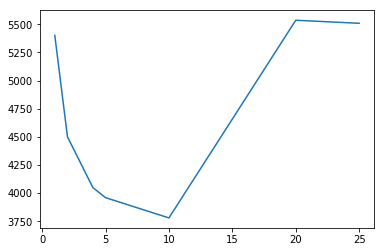

In [51]:
# Shell code for plotting in matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Plot
plt.plot(*zip(*points))
plt.show()

Problem 2: IO Cost Models
--------------------------------------

**_[15 points total]_**

In this problem we consider different join algorithms when joining relations $R(A,B)$,$S(B,C)$, and $T(C,D)$. We want to investigate the cost of various pairwise join plans and try to determine the best join strategy given some conditions.

Specifically, for each part of this question, we are intereseted determining some (or all) of the following variables:

* `P_R`: Number of pages of $R$
* `P_S`: Number of pages of $S$
* `P_RS`: Number of pages of output (and input) $RS$
* `P_T`: Number of pages of $T$
* `P_RST`: Number of pages of output (and input) $RS$
* `B`: Number of pages in buffer
* `IO_cost_join1`: Total IO cost of first join
* `IO_cost_join2`: Total IO cost of second join

#### Note:
* ** The output of join1 is always feed as one of the inputs to join 2 ** 
* **Use the "vanilla" versions of the algorithms as presented in lecture, _i.e. without any of the optimizations we mentioned_**
* **Again assume we use one page for output, as in lecture!**
* ** The abbreviates for the joins used are Sort-Merge Join (SMJ), Hash Join (HJ), and Block Nested Loop Join (BNLJ). **

### Part (a)

**_[8 points]_**

Given:
* `P_R`: 20
* `P_S`: 200
* `P_T`: 2000
* `P_RS`: 100
* `P_ST`: 1000
* `P_RST`: 500
* `B`: 32

Compute the IO cost for the following query plans:

* IO_Cost_HJ_1 where only hash join is used, $join1 = R(a,b),S(b,c)$ and $join2 = join1(a,b,c),T(c,d)$
* IO_Cost_HJ_2 where only hash join is used, $join1 = T(c,d),S(b,c)$ and $join2 = join1(b,c,d),R(a,b)$
* IO_Cost_SMJ_1 where only sort merge join is used, $join1 = R(a,b),S(b,c)$ and $join2 = join1(a,b,c),T(c,d)$
* IO_Cost_SMJ_2 where only sort merge join is used, $join1 = T(c,d),S(b,c)$ and $join2 = join1(b,c,d),R(a,b)$
* IO_Cost_BNLJ_1 where only block nested loop join is used, $join1 = R(a,b),S(b,c)$ and $join2 = join1(a,b,c),T(c,d)$
* IO_Cost_BNLJ_2 where only block nested loop merge join is used, $join1 = T(c,d),S(b,c)$ and $join2 = join1(b,c,d),R(a,b)$

**Note: again, be careful of rounding for this problem. Use ceiling/floors whenever it is necessary.**

Include 1-2 sentences (as a python comment) above each answer explaining the performance for each algorithm/query plan.

In [56]:
#Join 1: Hashing R and S costs 2(P_R+P_S) IO. Matching R and S costs (P_R+P_S) IO. Writing out costs P_RS IO.
#Join 2: Hashing RS and T costs 2(P_RS+P_T) IO. Matching RS and T costs (P_RS+P_T) IO. Writing out costs P_RST IO.
#join1+join2 = 3(P_R+P_S)+P_RS+3(P_RS+P_T)+P_RST = 7560 IO in total.
IO_Cost_HJ_1 = 7560

#Join 1: Hashing T and S costs 2(P_T+P_S) IO. Matching T and S costs (P_T+P_S) IO. Writing out costs P_TS IO.
#Join 2: Hashing ST and R costs 2(P_ST+P_R) IO. Matching ST and R costs (P_ST+P_R) IO. Writing out costs P_RST IO.
#join1+join2 = 11160 IO in total.
IO_Cost_HJ_2 = 11160

#Join 1: Splitting & Sorting R and S costs sort(P_R)+sort(P_S) = 2P_R+4P_S IO. Scanning R and S costs (P_R+P_S) IO. Writing out costs P_RS IO.
#Join 2: Splitting & Sorting RS and T costs sort(P_RS)+sort(P_T) = 4P_RS+6P_T IO. Scanning RS and T costs (P_RS+P_T) IO. Writing out costs P_RST IO.
#sort(P) = 2N(ceil(log(B-1)(N/B))+1), given B is the number of buffer pages.
#join1+join2= 1160+15000 IO in total.
IO_Cost_SMJ_1 = 16160

#Join 1: Splitting & Sorting T and S costs sort(P_T)+sort(P_S)=6P_T+4P_S IO. Scanning T and S costs (P_T+P_S) IO. Writing out costs P_TS IO.
#Join 2: Splitting & Sorting ST and R costs sort(P_ST)+sort(P_R) = 6P_ST+2P_R IO. Scanning ST and R costs (P_ST+P_R) IO. Writing out costs P_RST IO.
#join1+join2= 16000+7560 IO in total.
IO_Cost_SMJ_2 = 23560

#Join 1: Joining R and S costs P_R+ceil(P_R/(B-2))*P_S+P_RS IO. 
#Join 2: Joining RS and T costs P_RS+ceil(P_RS/(B-2))*P_T+P_RST IO. 
#join+join2 = 320+8600 IO in total.
IO_Cost_BNLJ_1 = 8920

#Join 1: Joining T and S costs P_S+ceil(P_S/(B-2))*P_T+P_ST IO. Total 4600 IO.
#Join 2: Joining ST and R costs P_R+ceil(P_R/(B-2))*P_ST+P_RST IO. Total 760 IO.
#join1+join2=15200+1520=16720 IO in total.
IO_Cost_BNLJ_2 = 16720

### Part (b)

For the query plan where $join1 = R(a,b),S(b,c)$ and $join2 = join1(a,b,c),T(c,d)$ find a configuration where using HJ for $join1$ and SMJ for $join2$ is cheaper than SMJ for $join1$ and HJ for $join2$. The output sizes you choose for P_RS and P_RS must be non-zero and feasible (e.g. the maximum output size of $join1$ is P_R*P_S). 

**_[8 points]_**

In [58]:
P_R = 20
P_S = 2000
P_T = 20
P_RS = 20
P_RST = 20
B = 32

#3(P_R+P_S)+P_RS = 6080
HJ_IO_Cost_join1 = 6080
#sort(P_RS)+sort(P_T)+P_RS+P_T+P_RST = 3P_RS+3P_T+P_RST = 140
SMJ_IO_Cost_join2 = 140

#sort(P_R)+sort(P_S)+P_R+P_S+P_RS = 3P_R+7P_S+P_RS = 14080
SMJ_IO_Cost_join1 = 14080
#3(P_RS+P_T)+P_RST = 140
HJ_IO_Cost_join2 = 140

Problem 3: Sequential Flooding
-----------------------------

**_[10 points total]_**

**Note: Before doing this question, it is highly recommended that you go through [Activity 15](http://web.stanford.edu/class/cs145/cs145-notebooks-2016/lecture-14-15/Activity-15.ipynb), which covers eviction policies for buffer managers such as LRU, and why _sequential flooding_ can sometimes occurs with LRU.**

In the activity accompanying Lecture 15, we saw something called _sequential flooding_ that can occur when a default eviction policy (for example LRU) is used by the buffer manager.  We saw that we can achieve much lower IO cost by using a different eviction policy, MRU ("most recently used").

**Note that "Most recently used" means most recently accessed, either from buffer or disk, consistent with what we showed in Activity-15.**

For this problem, we will take a closer look at the IO cost of different eviction policies when reading the pages of a file sequentially multiple times. 

## Part (a)
### Part (a.i)
**_[1 point]_**

Write a python function `lru_cost(N,M,B)` that computes the IO cost of the LRU eviction policy when reading in all the papges of an $N$-page file sequentially, $M$ times, using a bugger with $B+1$ pages.  Assume that after reading the files, you don't need to write them out (you can just release them, so there is no write IO cost).

In [59]:
def lru_cost(N, M, B):
    if N>B+1:
        return N*M
    else:
        return N

### Part (a.ii)
**_[2 points]_**

Write a python function `mru_cost(N,M,B)` that computes the IO cost of the MRU eviction policy when reading in all the papges of an $N$-page file sequentially, $M$ times, using a bugger with $B+1$ pages. Assume that after reading the files, you don't need to write them out (you can just release them, so there is no write IO cost).

In [90]:
def mru_cost(N, M, B):
    if N<=B+1:
        return N
    else:
        buff = []
        cost = 0
        m = 0
        while m < M:
            for n in range(N):
                if len(buff)<B+1 and n not in buff:
                    buff.append(n)
                    mru = buff.index(n) # record the mru of buffer
                    cost+=1
                else:
                    if n not in buff:
                        buff[mru]=n
                        mru = buff.index(n)
                        cost+=1
                        if n == N-1:
                            m+=1
                    else:
                        mru = buff.index(n)
                        if n == N-1:
                            m+=1
    return cost

In [94]:
mru_cost(3,50,1)

76

### Part (a.iii)
**_[2 points]_**

Now that you have written these functions, provide the tuples which generate the plot of **M vs. the absolute value of the difference between LRU and MRU in terms of IO cost** for $B=4$, $N=7$, and $M$ between 1 and 20 inclusive (saved as the variable `p3_lru_points`)

In [101]:
B = 4
N = 7
M = 20
# Provide a list of tuple (m, difference between LRU and MRU in terms of IO cost) here:
p3_lru_points = [(m, abs(lru_cost(N, m, B) - mru_cost(N, m, B))) for m in range(1, M+1)]

Again, you can optionally plot your answer to check that it seems reasonable- starter code for doing this in the notebook below:

In [102]:
p3_lru_points

[(1, 0),
 (2, 5),
 (3, 10),
 (4, 15),
 (5, 20),
 (6, 24),
 (7, 28),
 (8, 33),
 (9, 38),
 (10, 43),
 (11, 48),
 (12, 52),
 (13, 56),
 (14, 61),
 (15, 66),
 (16, 71),
 (17, 76),
 (18, 80),
 (19, 84),
 (20, 89)]

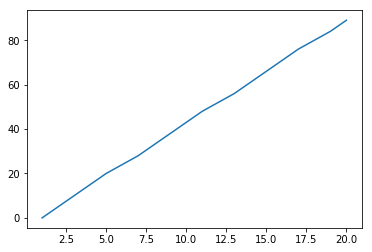

In [103]:
# Shell code for plotting in matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Plot
plt.plot(*zip(*p3_lru_points))
plt.show()

## Part (b)

Recall that the LRU eviction policy removes the least recently used page when the buffer is full and a new page is referenced which is not there in buffer. The basic idea behind LRU is that you timestamp your buffer elements, and use the timestamps to decide when to evict elements. Doing so efficiently, requires some serious book-keeping, this is why in practice many buffer managers try to approximate LRU with other eviction policies that are easier to implement. 

Here we will focus on the _CLOCK_ or _Second Chance_ policy. In the CLOCK eviction policy, the candidate pages for removal are considered left-to-right in a circular manner(with wraparound), and a page that has been accessed between consecutive considerations will not be replaced. The page replaced is the one that - considered in a circular manner - has not been accessed since its last consideration.

In more details the CLOCK policy proceeds maintains a circular list of pages in the buffer and uses an additional _clock (or second chance) bit_ for each page to track how often a page is accessed. The bit is set to 1 whenever a page is referenced. When clock needs to read in a new page in the buffer, it sweeps over existing pages in the buffer looking for one with second chance bit set to 0. It basically replaces pages that have not been referenced for one complete revolution of the clock. 

A high-level implementation of clock:
1. Associate a "second chance" bit with each page in the buffer. Initialize all bits to ZERO (0).
2. Each time a page is referenced in the buffer, set the "second chance" bit to ONE (1). this will give the page a second chance...
3. A new page read into a buffer page has the second chance bit set to ZERO (0).
4. When you need to find a page for removal, look in left-to-right in a circular manner(with wraparound) in the buffer pages:
    - If the second chance bit is ONE, reset its second chance bit (to ZERO) and continue.
    - If the second chance bit is ZERO, replace the page in the buffer.
    
You can find more details on CLOCK [here](http://cseweb.ucsd.edu/classes/wi08/cse221-a/papers/carr81.pdf).


### Part (b.i)
**_[4 points]_**

Write a python function `clock_cost(N,M,B)` that computes the IO cost of the CLOCK eviction policy when reading in all the papges of an $N$-page file sequentially, $M$ times, using a bugger with $B+1$ pages.  Assume that after reading the files, you don't need to write them out (you can just release them, so there is no write IO cost).

In [98]:
def clock_cost(N, M, B):
    if N>B+1:
        return N*M
    else:
        return N

### Part (b.ii)
**_[1 point]_**

Now that you have written the CLOCK cost function, provide the tuples which generate the plot of **M vs. the absolute value of the difference between LRU and CLOCK in terms of IO cost** for $B=4$, $N=7$, and $M$ between 1 and 20 inclusive (saved as the variable `p3_clock_points`).

In [99]:
B = 4
N = 7
M = 20
p3_clock_points = [(m, abs(lru_cost(N, m, B) - clock_cost(N, m, B))) for m in range(1, M+1)]

In [112]:
p3_clock_points

[(1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 0),
 (10, 0),
 (11, 0),
 (12, 0),
 (13, 0),
 (14, 0),
 (15, 0),
 (16, 0),
 (17, 0),
 (18, 0),
 (19, 0),
 (20, 0)]

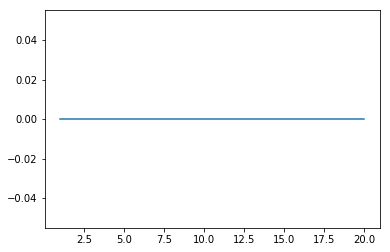

In [100]:
# Shell code for plotting in matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Plot
plt.plot(*zip(*p3_clock_points))
plt.show()

Does the CLOCK eviction policy prevent sequential flooding? How does it perform against LRU? Write a short explanation in the field below.

In [ ]:
# EXPLANATION GOES HERE
# No. The CLOCK eviction policy does not prevent sequential flooding. It works in the same way as LRU.

Problem 4: Hash Join Madden
-----------------------------

**_[10 points total]_**

The NFL season has started strong and Jack Del Rio ([The Oakland Raider's](https://www.youtube.com/watch?v=YXj7I1RzLSE) coach) wants to find out if Joe Flacco is an elite quarterback. He wants to do this by being more of a sabermetrics guy than a numbers guy. As a first step in doing this he wants to find out which are the colleges each NFL teams prefers drafting players from. We have access to two tables: (i) a table named "teams" which contains (team, player) pairs, and (ii) a table named "colleges" which contains (player, college) pairs. Being all excited about databases you decide that there is no other way but to join the two tables and get the desired results. However, you have no access to a database. Not even a challenge for you who decide to implement your favorite join algorithm on your own. And of course HASH JOIN is the way to go!!!


## Load and explore the data

The two tables are stored in files which can be loaded into memory as two lists of **named tuples** using the code below:

In [1]:
# Load data
import nfl
from nfl import *
teams, colleges = loadData()

Named tuples are basically lightweight object types and instances of named tuple instances can be referenced using object like variable deferencing or the standard tuple syntax. The following code prints the first 10 tuples from teams and colleges. *Notice how fields of named tuples are accessed inside the loops.*

In [7]:
# Print List Entries
print 'Table teams contains %d entries in total' % len(teams)
print 'Table colleges contains %d entries in total' % len(colleges)
print 
print 'First 10 entries in teams table'
for i in range(10):
    team = teams[i]
    print 'Entry %d' %(i+1),':',team.teamname, '|', team.playername
print 
print 'First 10 entries in college table'
for i in range(10):
    college = colleges[i]
    print 'Entry %d' %(i+1),':',college.collegename, '|', college.playername

Table teams contains 12720 entries in total
Table colleges contains 12720 entries in total

First 10 entries in teams table
Entry 1 : Houston Texans | Jadeveon Clowney
Entry 2 : St. Louis Rams | Greg Robinson
Entry 3 : Jacksonville Jaguars | Blake Bortles
Entry 4 : Buffalo Bills | Sammy Watkins
Entry 5 : Oakland Raiders | Khalil Mack
Entry 6 : Atlanta Falcons | Jake Matthews
Entry 7 : Tampa Bay Buccaneers | Mike Evans
Entry 8 : Cleveland Browns | Justin Gilbert
Entry 9 : Minnesota Vikings | Anthony Barr
Entry 10 : Detroit Lions | Eric Ebron

First 10 entries in college table
Entry 1 : South Carolina | Jadeveon Clowney
Entry 2 : Auburn | Greg Robinson
Entry 3 : UCF | Blake Bortles
Entry 4 : Clemson | Sammy Watkins
Entry 5 : Buffalo | Khalil Mack
Entry 6 : Texas A&M | Jake Matthews
Entry 7 : Texas A&M | Mike Evans
Entry 8 : Oklahoma State | Justin Gilbert
Entry 9 : UCLA | Anthony Barr
Entry 10 : North Carolina | Eric Ebron


## Down to business

During the lectures we saw that hash joins consist of two phases: The **Partition Phase** where using a hash function $h$ we split the two tables we want to join into $B$ buckets, and the **Matching Phase** where we iterate over each bucket and join the tuples from the two tables that match. Here you will need to implement a hash join in memory.

You are determined to implement the most efficient hash join possible! This is why you decide to implement your own hash function that will uniformly partition the entries of a table across $B$ buckets so that all buckets have roughly the same number of entries. You decide to use the following hash function:

In [8]:
# Define hash function
def h(x,buckets):
    rawKey = ord(x[1])
    return rawKey % buckets

You use this hash function to partition the tables. To do so you can use the helper method `partitionTable(table,hashfunction,buckets)` for convenience as shown next:

In [25]:
# Fix the number of buckets to 500
buckets = 500
# Partition the teams table using hash function h
teamsPartition = partitionTable(teams,h,buckets)
collegePartition = partitionTable(colleges,h,buckets)

In [109]:
teamsPartition[100]

[PlayerTeam(teamname='New York Giants', playername='Odell Beckham, Jr.'),
 PlayerTeam(teamname='Arizona Cardinals', playername='Ed Stinson'),
 PlayerTeam(teamname='Philadelphia Eagles', playername='Ed Reynolds'),
 PlayerTeam(teamname='Green Bay Packers', playername='Eddie Lacy'),
 PlayerTeam(teamname='Carolina Panthers', playername='Edmund Kugbila'),
 PlayerTeam(teamname='New York Jets', playername='Oday Aboushi'),
 PlayerTeam(teamname='New York Giants', playername='Adrien Robinson'),
 PlayerTeam(teamname='Washington Redskins', playername='Adam Gettis'),
 PlayerTeam(teamname='San Diego Chargers', playername='Edwin Baker'),
 PlayerTeam(teamname='Tampa Bay Buccaneers', playername='Adrian Clayborn'),
 PlayerTeam(teamname='Miami Dolphins', playername='Edmond Gates'),
 PlayerTeam(teamname='Detroit Lions', playername='Ndamukong Suh'),
 PlayerTeam(teamname='Baltimore Ravens', playername='Ed Dickson'),
 PlayerTeam(teamname='Buffalo Bills', playername='Ed Wang'),
 PlayerTeam(teamname='New York 

The output of `partitionTable()` is a dictionary with its keys corresponding to bucket numbers in $[0,B-1]$ and its entries to lists of named tuples.

## Part (a)
### Part (a.i)
**_[4 points]_**

It's now time to implement your own hash join! You only need to implement the merge phase of the hash join. The output of the method should correspond to the result of a join between teams and colleges over the ***playername*** attribute. The partition phase is implemented. You need to fill in the merge phase.

***Note: You should only use the two dictionaries t1Partition and t1Partition provide. No other data structures are allowed.***

In [104]:
def hashJoin(table1, table2, hashfunction,buckets):
    # Parition phase 
    t1Partition = partitionTable(table1,hashfunction,buckets)
    t2Partition = partitionTable(table2,hashfunction,buckets)
    # Merge phase
    result = []
    
    # ANSWER GOES HERE
    for i in range(0,buckets):
        t1 = t1Partition[i]
        t2 = t2Partition[i]
        for t1Entry in t1:
            for t2Entry in t2:
                if t2Entry.playername == t1Entry.playername:
                    result.append((t1Entry.teamname, t1Entry.playername, t2Entry.collegename))
    # To populate your output you should use the following code(t1Entry and t2Entry are possible var names for tuples)
    # result.append((t1Entry.teamname, t1Entry.playername, t2Entry.collegename))
    return result

### Part (a.ii)
**_[1 point]_**

It time to evaluate your algorithm! The code provided below executes the join between teams and colleges and measures the total execution time. 
What is the total number of entries output by your algorithm?

Does the runtime of your algorithm seem reasonable? Provide a brief explanation.

In [110]:
import time
start_time = time.time()
res1 = hashJoin(teams, colleges, h, buckets)
end_time = time.time()
duration = (end_time - start_time)*1000 #in ms
print 'The join took %0.2f ms and returned %d tuples in total' % (duration,len(res1))

# EXPLANATION GOES HERE
# The total number of entries output is reasonable, 12720 + 20 duplications (Andrew Jackson)
# However, the runtime is not reasonable.
# The runtime takes too long. For hash join, it should be much faster.
# The problem is that the hash function hashes data with skew, which increases match time.
# The algorithm can be more effective, with a better hash function.

The join took 7717.53 ms and returned 12740 tuples in total


## Part (b)

You decide to investigate the performance of `hashJoin( )` further. Since you implemented the merge phase of  `hashJoin( )` yourself you focus on the partitioning obtained by using the provided hash function `h( )`. 
In the lectures we saw that a good hash function should partition entries uniformly across buckets. We will now check if `h( )` is indeed a good function.

The following code generates a histogram of the bucket sizes for table teams (using the above hash function `h` and 500 buckets) to help figure out what is going wrong. 

[]

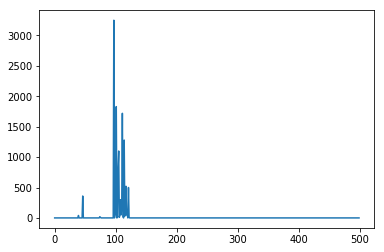

In [106]:
# Examine if this is a good partition function
def histogramPoints(partition):
    ids = range(buckets)
    items = []
    for i in range(buckets):
        if i in partition:
            items.append(len(partition[i]))
        else:
            items.append(0)
    return ids, items

%matplotlib inline
import matplotlib.pyplot as plt

# Plot bucket histogram
buckets = 500
teamsPartition = partitionTable(teams,h,buckets)
ids, counts = histogramPoints(teamsPartition)
plt.plot(ids, counts)
plt.plot()

#### Part (b.i)
**_[3 points]_**


Now find the skew associated with the above histogram. Skew is defined as the standard deviation of the number of entries in the buckets. A uniform hash function produces buckets of equal size, leading to 0 skew, but our candidate hash function h is imperfect so you should observe a positive skew.

In [107]:
# ANSWER
# partition- a table partition as returned by method partitionTable
# return value - a float representing the skew of hash function (i.e. stdev of chefs assigned to each restaurant)
import numpy
def calculateSkew(partition):
    # ANSWER STARTS HERE
    num_of_entry = []
    for i in range(0,len(partition)):
        num_of_entry.append(len(partition[i]))
    skew = numpy.std(num_of_entry)
    # ANSWER ENDS HERE
    return skew

print calculateSkew(teamsPartition)

204.832630213


#### Part (b.ii)

**_[1 point]_**

Use python's hash function to see if you can produce a better (aka smaller) runtime for hash join. As at the beginning of part b, make a histogram of the bucket sizes (this time using the new hash function and 500 buckets). You can plot your histogram using the same code provided above.

[]

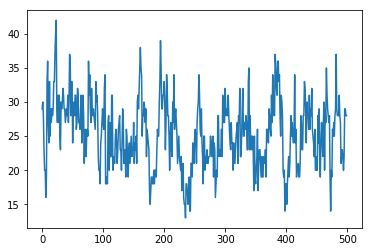

In [111]:
# Design a better hash function and print the skew difference for 
def hBetter(x,buckets):
    rawKey = hash(x)
    return rawKey % buckets

# Plot bucket histogram
buckets = 500
teamsPartition = partitionTable(teams,hBetter,buckets)
ids, counts = histogramPoints(teamsPartition)
plt.plot(ids, counts)
plt.plot()

#### Part (b.iii)

**_[1 point]_**

Rerun your hash join algorithm with the new hash function you designed and 500 buckets.
Does the algorithm run faster? If so what is the speed-up you are observing?

In [35]:
start_time = time.time()

res1 = hashJoin(teams, colleges, hBetter, buckets)

end_time = time.time()
duration = (end_time - start_time)*1000 #in ms
print 'The join took %0.2f ms and returned %d tuples in total' % (duration,len(res1))

# WRITE DOWN THE SPEED UP
# Reduced from 8000ms to 201ms - 40 times faster than the previous hash function.
# The hash join is faster with less skew during the partition phase.

The join took 200.31 ms and returned 12740 tuples in total


## Part (c)
**_[0 points]_**

For our internal sabermetrics purposes. Is Joe Flacco an elite quarterback? (True for elite, False for not elite)

In [ ]:
flacco_elite = True